## 1. Setup and Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.linalg import eigh
from scipy.special import hermite
import sympy as sp
from sympy import symbols, diff, integrate, solve, sqrt, pi, exp, simplify, oo
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['lines.linewidth'] = 2

print("Libraries loaded successfully")

Libraries loaded successfully


## 2. What Does "Fixed Background Spacetime" Mean?

### Definition

**Fixed background spacetime** means:

1. **The metric is given:** We start with a metric tensor $g_{\mu\nu}(x^\alpha)$ that is specified beforehand.
   - In flat (Minkowski) spacetime: $g_{\mu\nu} = \text{diag}(-1, 1, 1, 1)$ (or $(+1,-1,-1,-1)$ in different conventions)
   - The metric does NOT change based on what happens inside it

2. **Time is a parameter:** Time appears as a parameter $t$ in the Schrödinger equation:
   $$i\hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi(\mathbf{x}, t)
   $$
   We solve for how $\psi$ changes AS a function of $t$, but $t$ itself is an external, absolute quantity.

3. **Space is inert:** The spatial coordinates $(x, y, z)$ are fixed labels for points in space.
   - We never ask: "How does the distance between two points change?"
   - The answer is always: "It doesn't change—it's a fixed background."

4. **Observables live in this background:** The position operator $\hat{x}$ has eigenstates localized at various points in this fixed space.
   - The eigenvalues are position coordinates in the fixed background
   - When we measure position, we find the particle at some point in this pre-existing coordinate system

### Comparison to General Relativity

| Aspect | Quantum Mechanics | General Relativity |
|--------|-------------------|-------------------|
| **Metric** | Fixed: $g_{\mu\nu} = \text{const}$ | Dynamical: determined by $T_{\mu\nu}$ |
| **Time** | External parameter | Coordinate (same as spatial coordinates) |
| **Spacetime** | Inert background/stage | Active player; gravity = geometry |
| **Evolution** | $\psi$ evolves in spacetime | Spacetime geometry itself evolves |
| **Equation** | $i\hbar \frac{\partial \psi}{\partial t} = \hat{H}\psi$ | $G_{\mu\nu} = 8\pi G T_{\mu\nu}$ |

---

## 3. Example 1: The Free Particle in Flat Spacetime

### Mathematical Setup

The simplest example: a single particle with **no potential** in **flat 1D space**.

**The background spacetime:**
- Metric: Minkowski metric (flat spacetime) with signature $(-,+,+,+)$: $ds^2 = -c^2 dt^2 + dx^2 + dy^2 + dz^2$
- In natural units ($c = \hbar = 1$): $ds^2 = -dt^2 + dx^2$
- This metric is **fixed**—it never changes
- The coordinates $(t, x, y, z)$ are **absolute labels** for events

**The Hamiltonian:**
$$\hat{H} = \frac{\hat{p}^2}{2m} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}$$

This is kinetic energy only (no potential).

**The Schrödinger equation:**
$$i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2}$$

Notice: $t$ appears as an external parameter. We're asking: given the spatial coordinate $x$ (which lies in our fixed background), how does the wave function evolve with respect to the time parameter?

### Analytical Solution

The general solution is a superposition of plane waves:
$$\psi(x,t) = \int_{-\infty}^{\infty} dk \, c(k) e^{i(kx - \omega(k)t)}$$

where the dispersion relation is:
$$\hbar\omega = \frac{\hbar^2 k^2}{2m} \quad \Rightarrow \quad \omega(k) = \frac{\hbar k^2}{2m}$$

**Key point:** This dispersion relation is FIXED because spacetime (and hence the metric) is fixed. A different background spacetime would give a different dispersion relation.

EXAMPLE 1: FREE PARTICLE IN FLAT SPACETIME

FIXED BACKGROUND SPACETIME:
----------------------------------------------------------------------

The metric tensor (Minkowski, flat spacetime):

  g_μν = diag(-1, 1, 1, 1)  (signature: -,+,+,+)

This metric is FIXED. It does not change based on what happens inside it.

Spatial coordinate grid (FIXED): x ∈ [-10.0, 10.0] with Δx = 0.0401

Time parameter (FIXED): t ∈ [0, ∞) as external parameter


INITIAL CONDITION (at t=0):
----------------------------------------------------------------------

Gaussian wave packet (real part):
  ψ(x,0) = (2πσ²)^(-1/4) exp(-x²/4σ²)

Width: σ = 1.0
Center position: x₀ = 0.0 (in fixed background coordinates)
Initial momentum: k₀ = 2.0


TIME EVOLUTION IN FIXED SPACETIME:
----------------------------------------------------------------------

The Schrödinger equation: i·ℏ·∂ψ/∂t = -ℏ²/2m · ∂²ψ/∂x²

Time is an EXTERNAL PARAMETER. We integrate this equation as:

  ψ(x, t+Δt) = ???

The spatial coordinates x are FI

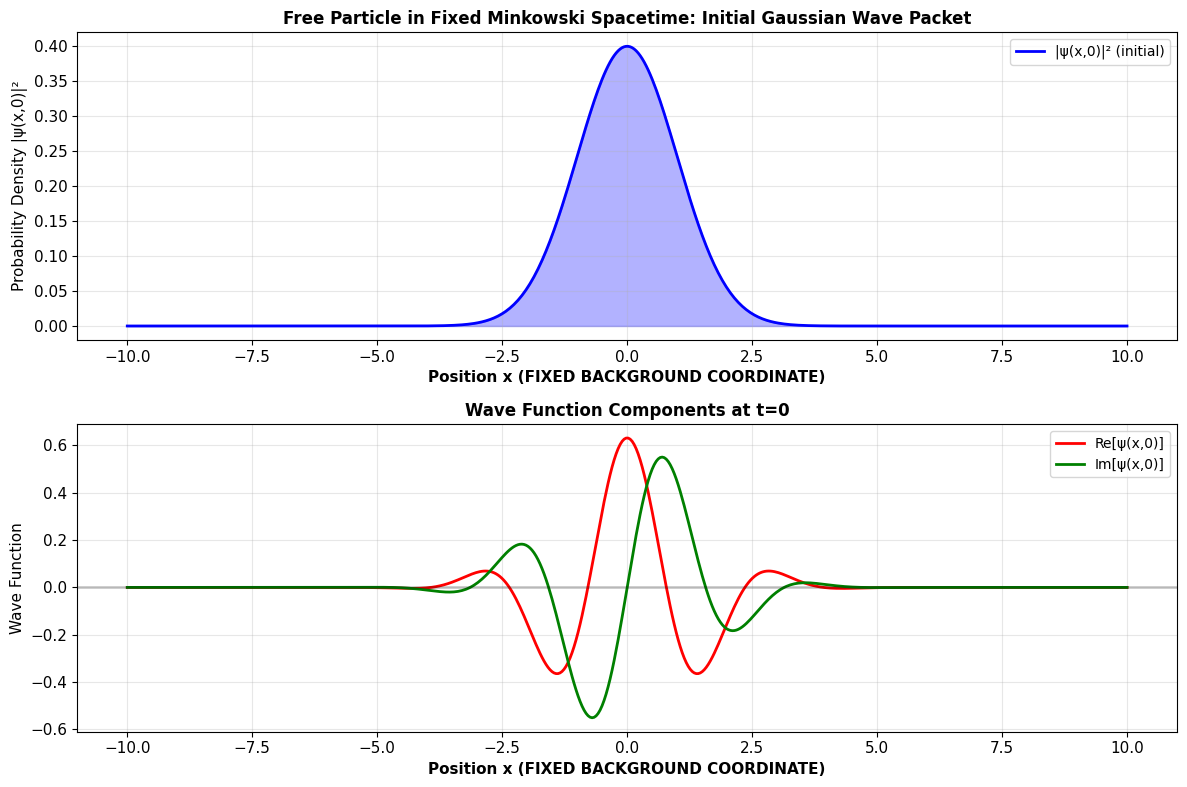


KEY POINTS:
----------------------------------------------------------------------

1. The x-axis shows FIXED spatial coordinates of the background.
   These coordinates never change—they label points in space.

2. The wave function ψ(x,t) is defined at each fixed coordinate x.
   As time evolves, the amplitude ψ at each x changes.

3. The probability density |ψ(x,t)|² tells us: at time t, what is
   the probability to find the particle at position x.

4. The metric g_μν (spacetime structure) is unchanging and fixed.


In [3]:
# Example 1: Free particle in flat spacetime
# Demonstrate the fixed background by showing how the wave packet evolves

print("="*70)
print("EXAMPLE 1: FREE PARTICLE IN FLAT SPACETIME")
print("="*70)
print()

# Define parameters
m = 1.0          # Mass (normalized to 1)
hbar = 1.0       # Reduced Planck constant (natural units)
x_max = 10.0     # Spatial extent
t_max = 5.0      # Time extent

# The key insight: position and time are FIXED COORDINATES
# We specify them as a grid on which the wave function evolves
x = np.linspace(-x_max, x_max, 500)  # FIXED SPATIAL COORDINATES
dx = x[1] - x[0]

print("FIXED BACKGROUND SPACETIME:")
print("-" * 70)
print()
print("The metric tensor (Minkowski, flat spacetime):")
print()
print("  g_μν = diag(-1, 1, 1, 1)  (signature: -,+,+,+)")
print()
print("This metric is FIXED. It does not change based on what happens inside it.")
print()
print(f"Spatial coordinate grid (FIXED): x ∈ [{-x_max}, {x_max}] with Δx = {dx:.4f}")
print()
print("Time parameter (FIXED): t ∈ [0, ∞) as external parameter")
print()
print()

# Initial wave packet: Gaussian
print("INITIAL CONDITION (at t=0):")
print("-" * 70)
print()
print("Gaussian wave packet (real part):")
print("  ψ(x,0) = (2πσ²)^(-1/4) exp(-x²/4σ²)")
print()

sigma = 1.0  # Width of Gaussian
x0 = 0.0     # Center position (in fixed background)
k0 = 2.0     # Mean wavenumber (momentum)

# Unnormalized Gaussian wave packet with momentum
psi_0_un = np.exp(-(x - x0)**2 / (4*sigma**2)) * np.exp(1j*k0*x)

# Normalize
norm = np.sqrt(np.sum(np.abs(psi_0_un)**2) * dx)
psi_0 = psi_0_un / norm

print(f"Width: σ = {sigma}")
print(f"Center position: x₀ = {x0} (in fixed background coordinates)")
print(f"Initial momentum: k₀ = {k0}")
print()
print()

# Time evolution using split-step method
print("TIME EVOLUTION IN FIXED SPACETIME:")
print("-" * 70)
print()
print("The Schrödinger equation: i·ℏ·∂ψ/∂t = -ℏ²/2m · ∂²ψ/∂x²")
print()
print("Time is an EXTERNAL PARAMETER. We integrate this equation as:")
print()
print("  ψ(x, t+Δt) = ???")
print()
print("The spatial coordinates x are FIXED—they don't change.")
print("Only the wave function values ψ(x,t) at each fixed coordinate change.")
print()

# For free particle, use Fourier space
# ψ(x,t) = (1/√(2π)) ∫ dk φ(k) exp(i(kx - ω(k)t))
# where ω(k) = ℏk²/2m

print("For free particle, solution in Fourier space:")
print()
print("  ψ(x,t) = (1/√(2π)) ∫ dk φ(k) exp(i·k·x - i·ω(k)·t)")
print()
print("  Dispersion relation: ω(k) = ℏk²/2m")
print()
print(f"  With our values: ω(k) = {hbar/(2*m):.3f} k²")
print()
print("This dispersion relation is FIXED because spacetime is fixed.")
print()
print()

# Plot initial wave packet
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Probability density at t=0
prob_0 = np.abs(psi_0)**2
ax1.plot(x, prob_0, 'b-', linewidth=2, label='|ψ(x,0)|² (initial)')
ax1.fill_between(x, 0, prob_0, alpha=0.3, color='blue')
ax1.set_xlabel('Position x (FIXED BACKGROUND COORDINATE)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Probability Density |ψ(x,0)|²', fontsize=11)
ax1.set_title('Free Particle in Fixed Minkowski Spacetime: Initial Gaussian Wave Packet', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Real part of wave function
ax2.plot(x, np.real(psi_0), 'r-', label='Re[ψ(x,0)]', linewidth=2)
ax2.plot(x, np.imag(psi_0), 'g-', label='Im[ψ(x,0)]', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.2)
ax2.set_xlabel('Position x (FIXED BACKGROUND COORDINATE)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Wave Function', fontsize=11)
ax2.set_title('Wave Function Components at t=0', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

print()
print("KEY POINTS:")
print("-" * 70)
print()
print("1. The x-axis shows FIXED spatial coordinates of the background.")
print("   These coordinates never change—they label points in space.")
print()
print("2. The wave function ψ(x,t) is defined at each fixed coordinate x.")
print("   As time evolves, the amplitude ψ at each x changes.")
print()
print("3. The probability density |ψ(x,t)|² tells us: at time t, what is")
print("   the probability to find the particle at position x.")
print()
print("4. The metric g_μν (spacetime structure) is unchanging and fixed.")

## 4. Example 2: Particle in a Potential Well (Fixed Coordinates)

### The Setup

A particle confined in an **infinite square well** potential:

$$V(x) = \begin{cases} 0 & \text{if } 0 < x < L \\ \infty & \text{otherwise} \end{cases}$$

**Key observation:** The potential function $V(x)$ depends on the **spatial coordinate** $x$ in our fixed background.

We're not asking: "Does the potential move or change?"

We're asking: "At the fixed position $x$, what is the potential?"

The potential is a **function of the fixed coordinates**. It is part of the **fixed structure** of spacetime and the setup.

### The Schrödinger Equation

$$i\hbar \frac{\partial \psi}{\partial t} = \left[-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)\right] \psi(x,t)$$

Again: time $t$ is an external parameter. Position $x$ is a fixed coordinate label.

### Stationary States

For bound states, we look for solutions of the form $\psi(x,t) = \psi_n(x) e^{-iE_n t/\hbar}$:

$$-\frac{\hbar^2}{2m} \frac{d^2\psi_n}{dx^2} + V(x)\psi_n = E_n \psi_n$$

For the infinite square well:
$$\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right), \quad E_n = \frac{n^2\pi^2\hbar^2}{2mL^2}$$

**Interpretation:** These are wave functions at **fixed positions** $x \in [0,L]$. Each point $x$ in the fixed background has a specific amplitude $\psi_n(x)$.

EXAMPLE 2: PARTICLE IN INFINITE SQUARE WELL

THE FIXED BACKGROUND:
----------------------------------------------------------------------

Same as before:
  - Minkowski metric (flat spacetime) is fixed: g_μν = diag(-1,1,1,1)
  - Spatial coordinates x ∈ [0, L] label fixed positions
  - Time t is an external parameter


THE POTENTIAL:
----------------------------------------------------------------------

The potential V(x) is a FUNCTION OF POSITION in our fixed background:

  V(x) = 0        for 0 < x < L
  V(x) = ∞        for x ≤ 0 or x ≥ L

The potential defines WALLS at the FIXED COORDINATES x=0 and x=L.

These walls do NOT move—they are fixed in spacetime.




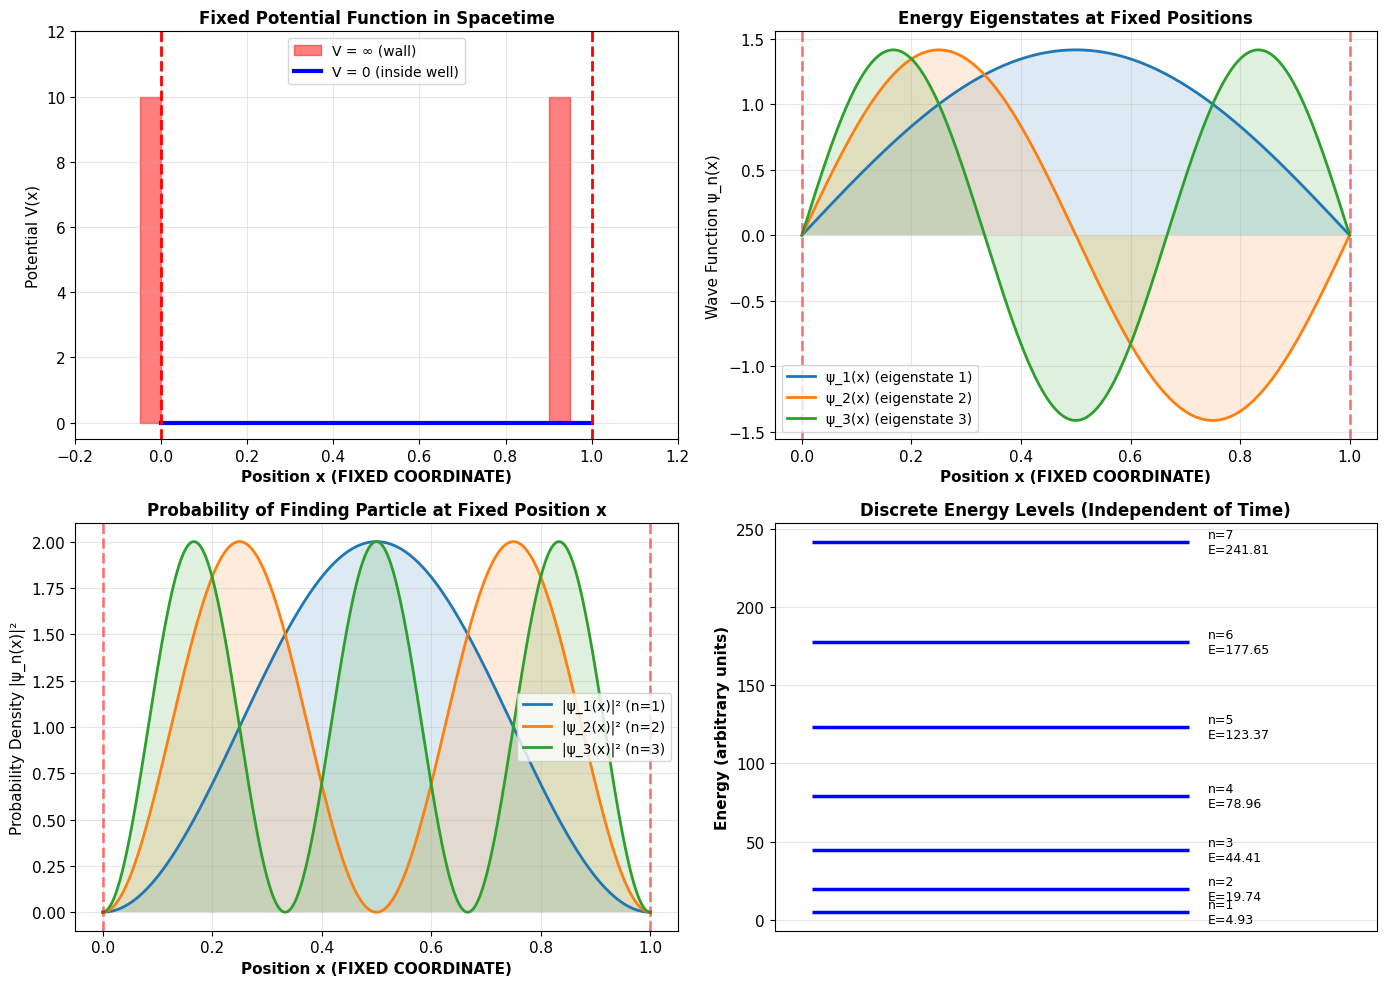

ENERGY EIGENVALUES:
----------------------------------------------------------------------

E_n = n²π²ℏ²/(2mL²)

  E_1 = 1²π² × 0.5000 = 4.9348
  E_2 = 2²π² × 0.5000 = 19.7392
  E_3 = 3²π² × 0.5000 = 44.4132
  E_4 = 4²π² × 0.5000 = 78.9568
  E_5 = 5²π² × 0.5000 = 123.3701


INTERPRETATION OF FIXED BACKGROUND:
----------------------------------------------------------------------

1. The well boundaries (walls) are at FIXED POSITIONS x=0 and x=L.

2. Each eigenstate ψ_n(x) is a probability amplitude at each
   FIXED POSITION x ∈ [0,L] in the background.

3. The plot |ψ_n(x)|² answers: 'At the fixed position x, what is
   the probability to find the particle there?'

4. As time evolves: ψ_n(x,t) = ψ_n(x) e^(-iE_n·t/ℏ)
   The spatial part ψ_n(x) doesn't change (stationary state).
   Only the global phase e^(-iE_n·t/ℏ) evolves with time parameter t.

5. The potential V(x) is STATIC—a function of fixed coordinates.
   It doesn't respond to the presence of the particle.


In [6]:
# Example 2: Particle in infinite square well (fixed background)

print("="*70)
print("EXAMPLE 2: PARTICLE IN INFINITE SQUARE WELL")
print("="*70)
print()

print("THE FIXED BACKGROUND:")
print("-" * 70)
print()
print("Same as before:")
print("  - Minkowski metric (flat spacetime) is fixed: g_μν = diag(-1,1,1,1)")
print("  - Spatial coordinates x ∈ [0, L] label fixed positions")
print("  - Time t is an external parameter")
print()
print()

print("THE POTENTIAL:")
print("-" * 70)
print()
print("The potential V(x) is a FUNCTION OF POSITION in our fixed background:")
print()
print("  V(x) = 0        for 0 < x < L")
print("  V(x) = ∞        for x ≤ 0 or x ≥ L")
print()
print("The potential defines WALLS at the FIXED COORDINATES x=0 and x=L.")
print()
print("These walls do NOT move—they are fixed in spacetime.")
print()
print()

L = 1.0  # Width of well (normalized to 1)
m = 1.0  # Mass
hbar = 1.0  # Planck constant

# Position grid (fixed)
x = np.linspace(0, L, 1000)
dx = x[1] - x[0]

# Plot the potential (fixed in space)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: The fixed potential
ax = axes[0, 0]
V = np.zeros_like(x)
V[x <= 0] = 10  # Plot large value for infinity
V[x >= L] = 10

ax.fill_between(x-0.05, 0, 10, where=(x <= 0.05), alpha=0.5, color='red', label='V = ∞ (wall)')
ax.fill_between(x-0.05, 0, 10, where=(x >= L-0.05), alpha=0.5, color='red')
ax.plot([0, L], [0, 0], 'b-', linewidth=3, label='V = 0 (inside well)')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.axvline(x=L, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Position x (FIXED COORDINATE)', fontsize=11, fontweight='bold')
ax.set_ylabel('Potential V(x)', fontsize=11)
ax.set_title('Fixed Potential Function in Spacetime', fontsize=12, fontweight='bold')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.5, 12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 2: First few eigenstates
ax = axes[0, 1]
for n in range(1, 4):
    psi_n = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    ax.plot(x, psi_n, label=f'ψ_{n}(x) (eigenstate {n})', linewidth=2)
    ax.fill_between(x, 0, psi_n, alpha=0.15)

ax.set_xlabel('Position x (FIXED COORDINATE)', fontsize=11, fontweight='bold')
ax.set_ylabel('Wave Function ψ_n(x)', fontsize=11)
ax.set_title('Energy Eigenstates at Fixed Positions', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax.axvline(x=L, color='red', linestyle='--', alpha=0.5)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 3: Probability densities
ax = axes[1, 0]
for n in range(1, 4):
    psi_n = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
    prob = np.abs(psi_n)**2
    ax.plot(x, prob, label=f'|ψ_{n}(x)|² (n={n})', linewidth=2)
    ax.fill_between(x, 0, prob, alpha=0.15)

ax.set_xlabel('Position x (FIXED COORDINATE)', fontsize=11, fontweight='bold')
ax.set_ylabel('Probability Density |ψ_n(x)|²', fontsize=11)
ax.set_title('Probability of Finding Particle at Fixed Position x', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='red', linestyle='--', alpha=0.5)
ax.axvline(x=L, color='red', linestyle='--', alpha=0.5)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Plot 4: Energy levels
ax = axes[1, 1]
n_vals = np.arange(1, 8)
E_vals = (n_vals**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

for i, (n, E) in enumerate(zip(n_vals, E_vals)):
    ax.hlines(E, 0, 1, colors='blue', linewidth=2.5)
    ax.text(1.05, E, f'n={n}\nE={E:.2f}', va='center', fontsize=9)

ax.set_ylabel('Energy (arbitrary units)', fontsize=11, fontweight='bold')
ax.set_title('Discrete Energy Levels (Independent of Time)', fontsize=12, fontweight='bold')
ax.set_xlim(-0.1, 1.5)
ax.set_xticks([])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("ENERGY EIGENVALUES:")
print("-" * 70)
print()
print(f"E_n = n²π²ℏ²/(2mL²)")
print()
for n in range(1, 6):
    E_n = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)
    print(f"  E_{n} = {n}²π² × {hbar**2/(2*m*L**2):.4f} = {E_n:.4f}")

print()
print()
print("INTERPRETATION OF FIXED BACKGROUND:")
print("-" * 70)
print()
print("1. The well boundaries (walls) are at FIXED POSITIONS x=0 and x=L.")
print()
print("2. Each eigenstate ψ_n(x) is a probability amplitude at each")
print("   FIXED POSITION x ∈ [0,L] in the background.")
print()
print("3. The plot |ψ_n(x)|² answers: 'At the fixed position x, what is")
print("   the probability to find the particle there?'")
print()
print("4. As time evolves: ψ_n(x,t) = ψ_n(x) e^(-iE_n·t/ℏ)")
print("   The spatial part ψ_n(x) doesn't change (stationary state).")
print("   Only the global phase e^(-iE_n·t/ℏ) evolves with time parameter t.")
print()
print("5. The potential V(x) is STATIC—a function of fixed coordinates.")
print("   It doesn't respond to the presence of the particle.")

## 5. Example 3: Quantum Field Theory in Curved Spacetime (Still Fixed Background)

### The Subtlety

Even in **curved spacetime**, quantum field theory treats spacetime as a **fixed background**.

This is the realm of **Hawking radiation** and **particle creation in curved spacetime**.

**Important distinction:**
- The spacetime is **curved** (the metric $g_{\mu\nu}$ is not flat)
- But it is still **fixed** (not dynamical)
- We specify the metric beforehand (e.g., Schwarzschild metric for a black hole)
- Then we quantize fields in that curved background

### Example: Schwarzschild Spacetime

The Schwarzschild metric (black hole):
$$ds^2 = -\left(1 - \frac{2M}{r}\right) dt^2 + \left(1 - \frac{2M}{r}\right)^{-1} dr^2 + r^2(d\theta^2 + \sin^2\theta \, d\phi^2)$$

**Key point:** This metric is **given/fixed**. We don't solve for it—we specify it.

Then we ask: "In this fixed curved spacetime, how do quantum fields behave?"

This leads to:
- **Hawking radiation**: thermal particle creation at the black hole horizon
- **Unruh effect**: acceleration creates thermal background
- **Particle creation in expanding universe**: cosmic inflation produces particles

All of these are examples of quantum fields evolving in **fixed (but curved) background spacetime**.

### The Contrast with Quantum Gravity

In **quantum gravity**, we'd want to:
- **Not** specify the metric $g_{\mu\nu}$ beforehand
- Instead, **quantize** the metric itself
- Let the metric emerge as a quantum observable
- Have spacetime become dynamical and responsive to quantum fluctuations

But this is **incredibly difficult** and remains unsolved.

EXAMPLE 3: QUANTUM FIELDS IN FIXED CURVED SPACETIME

SCHWARZSCHILD SPACETIME (BLACK HOLE):
----------------------------------------------------------------------

The metric (FIXED, but CURVED):

  ds² = -(1 - 2M/r) dt² + (1 - 2M/r)⁻¹ dr² + r²(dθ² + sin²θ dφ²)

where M is the black hole mass (parameter we specify).

This metric is GIVEN TO US. We don't solve for it.
It is the FIXED BACKGROUND for quantum field theory.


INTERPRETATION:
----------------------------------------------------------------------

1. The BLACK HOLE is a FIXED geometric feature of spacetime.
   Its event horizon is at the FIXED coordinate location r = 2M.

2. The CURVATURE at each point (r,θ,φ) is determined by the metric.
   This curvature is FIXED—we specify it beforehand.

3. QUANTUM FIELDS live in this fixed curved background.

4. These fields can undergo PARTICLE CREATION due to the curvature.
   This is Hawking radiation.




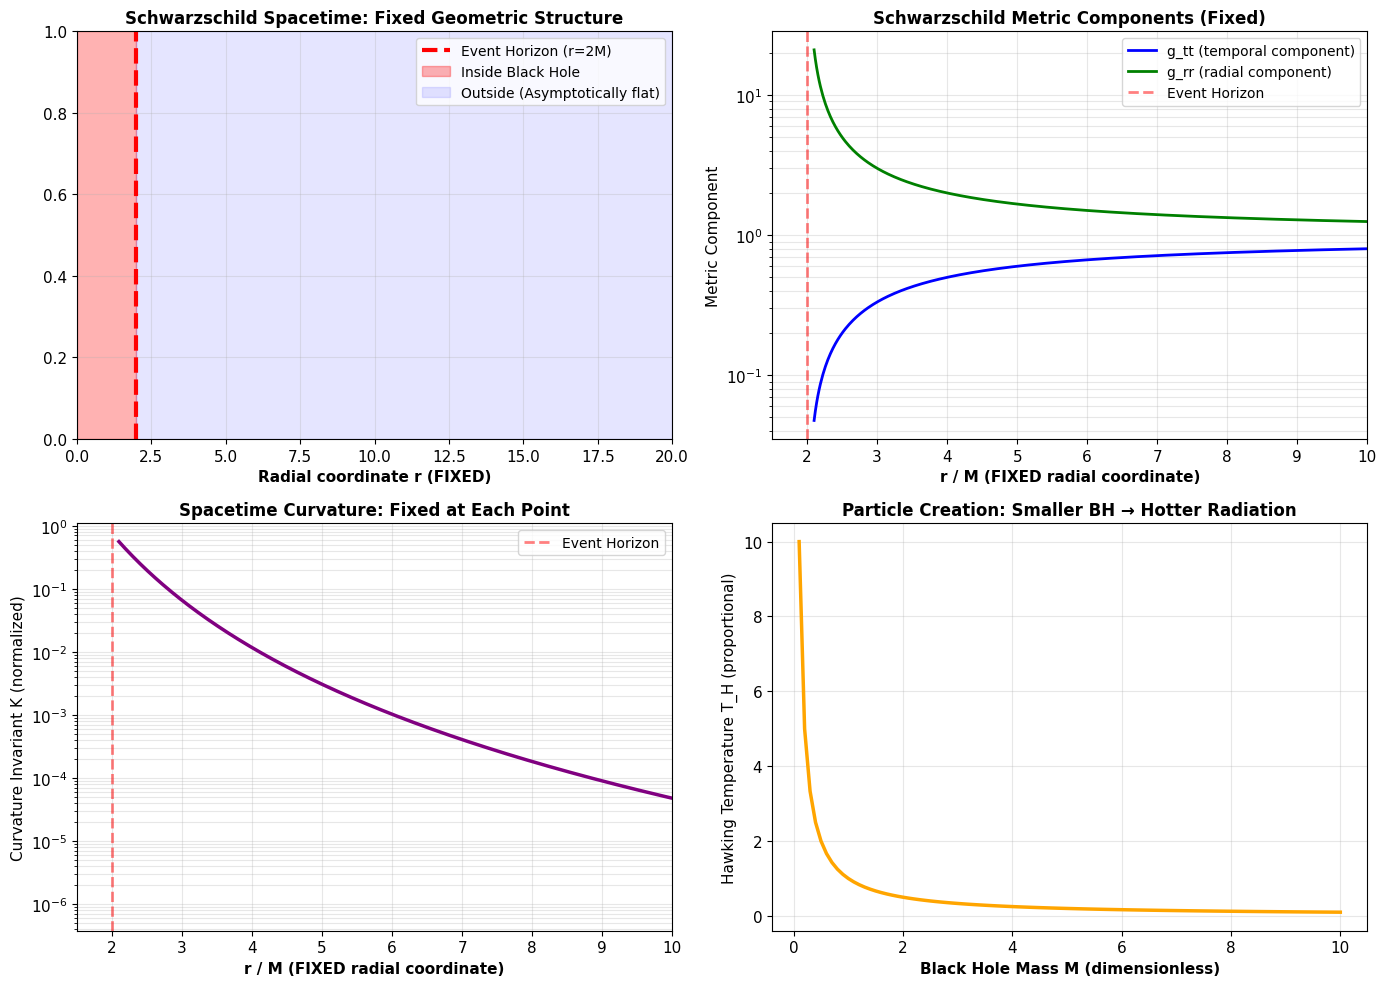


HAWKING RADIATION (Quantum Fields in Fixed Curved Background):
----------------------------------------------------------------------

Stephen Hawking discovered (1974): Black holes evaporate!

Temperature: T_H = ℏc³ / (8πk_B G M)

This temperature arises from QUANTUM EFFECTS in the FIXED curved spacetime.

For solar mass black hole (M ~ 2×10³⁰ kg): T_H ~ 10⁻⁷ K (tiny!)
For Planck mass black hole (M ~ 10⁻⁸ kg): T_H ~ 10²¹ K (huge!)


KEY DISTINCTION:
----------------------------------------------------------------------

This is STILL quantum field theory with FIXED background!

The black hole spacetime geometry is STATIC:
  - The event horizon location (r = 2M) is fixed
  - The metric g_μν at each point is fixed
  - The curvature is fixed

What we DON'T have: the metric responding to quantum particles created.

In true QUANTUM GRAVITY:
  - The metric would be QUANTIZED
  - Particle creation would BACK-REACT on the metric
  - The spacetime geometry itself would be dynamical

This is o

In [5]:
# Example 3: Schwarzschild spacetime (curved but fixed background)

print("="*70)
print("EXAMPLE 3: QUANTUM FIELDS IN FIXED CURVED SPACETIME")
print("="*70)
print()

print("SCHWARZSCHILD SPACETIME (BLACK HOLE):")
print("-" * 70)
print()
print("The metric (FIXED, but CURVED):")
print()
print("  ds² = -(1 - 2M/r) dt² + (1 - 2M/r)⁻¹ dr² + r²(dθ² + sin²θ dφ²)")
print()
print("where M is the black hole mass (parameter we specify).")
print()
print("This metric is GIVEN TO US. We don't solve for it.")
print("It is the FIXED BACKGROUND for quantum field theory.")
print()
print()

print("INTERPRETATION:")
print("-" * 70)
print()
print("1. The BLACK HOLE is a FIXED geometric feature of spacetime.")
print("   Its event horizon is at the FIXED coordinate location r = 2M.")
print()
print("2. The CURVATURE at each point (r,θ,φ) is determined by the metric.")
print("   This curvature is FIXED—we specify it beforehand.")
print()
print("3. QUANTUM FIELDS live in this fixed curved background.")
print()
print("4. These fields can undergo PARTICLE CREATION due to the curvature.")
print("   This is Hawking radiation.")
print()
print()

# Plot the Schwarzschild metric
M = 1.0  # Black hole mass (normalized)
r = np.linspace(2.1*M, 20*M, 1000)  # Radial coordinate (fixed)

# Metric components
g_tt = -(1 - 2*M/r)    # Time-time component
g_rr = 1 / (1 - 2*M/r)  # Radial-radial component

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Event horizon
ax = axes[0, 0]
r_horizon = 2*M
ax.axvline(x=r_horizon, color='red', linestyle='--', linewidth=3, label='Event Horizon (r=2M)')
ax.axvspan(0, r_horizon, alpha=0.3, color='red', label='Inside Black Hole')
ax.axvspan(r_horizon, 20*M, alpha=0.1, color='blue', label='Outside (Asymptotically flat)')
ax.set_xlabel('Radial coordinate r (FIXED)', fontsize=11, fontweight='bold')
ax.set_title('Schwarzschild Spacetime: Fixed Geometric Structure', fontsize=12, fontweight='bold')
ax.set_xlim(0, 20*M)
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)

# Plot 2: Metric components
ax = axes[0, 1]
ax.plot(r/M, -g_tt, label='g_tt (temporal component)', linewidth=2, color='blue')
ax.plot(r/M, g_rr, label='g_rr (radial component)', linewidth=2, color='green')
ax.axvline(x=2, color='red', linestyle='--', alpha=0.5, label='Event Horizon')
ax.set_xlabel('r / M (FIXED radial coordinate)', fontsize=11, fontweight='bold')
ax.set_ylabel('Metric Component', fontsize=11)
ax.set_title('Schwarzschild Metric Components (Fixed)', fontsize=12, fontweight='bold')
ax.set_xlim(1.5, 10)
ax.set_yscale('log')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, which='both')

# Plot 3: Spacetime curvature (Ricci scalar)
ax = axes[1, 0]
# For Schwarzschild, R_scalar = 0 (Ricci-flat, vacuum solution)
# But we can plot Kretschmann scalar K = R_μνρσ R^μνρσ
K = (48 * M**2) / r**6  # Kretschmann scalar
ax.plot(r/M, K * M**6, linewidth=2.5, color='purple')
ax.axvline(x=2, color='red', linestyle='--', alpha=0.5, label='Event Horizon')
ax.set_xlabel('r / M (FIXED radial coordinate)', fontsize=11, fontweight='bold')
ax.set_ylabel('Curvature Invariant K (normalized)', fontsize=11)
ax.set_title('Spacetime Curvature: Fixed at Each Point', fontsize=12, fontweight='bold')
ax.set_xlim(1.5, 10)
ax.set_yscale('log')
ax.grid(True, alpha=0.3, which='both')
ax.legend(fontsize=10)

# Plot 4: Hawking temperature
ax = axes[1, 1]
# Hawking temperature T_H = ℏc³/(8πk_B G M)
# For dimensionless plot, T_H ∝ 1/M
M_vals = np.linspace(0.1, 10, 100)  # Black hole masses
T_H = 1 / M_vals  # Hawking temperature (proportional)

ax.plot(M_vals, T_H, linewidth=2.5, color='orange')
ax.set_xlabel('Black Hole Mass M (dimensionless)', fontsize=11, fontweight='bold')
ax.set_ylabel('Hawking Temperature T_H (proportional)', fontsize=11)
ax.set_title('Particle Creation: Smaller BH → Hotter Radiation', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print()
print("HAWKING RADIATION (Quantum Fields in Fixed Curved Background):")
print("-" * 70)
print()
print("Stephen Hawking discovered (1974): Black holes evaporate!")
print()
print("Temperature: T_H = ℏc³ / (8πk_B G M)")
print()
print("This temperature arises from QUANTUM EFFECTS in the FIXED curved spacetime.")
print()
print(f"For solar mass black hole (M ~ 2×10³⁰ kg): T_H ~ 10⁻⁷ K (tiny!)")
print(f"For Planck mass black hole (M ~ 10⁻⁸ kg): T_H ~ 10²¹ K (huge!)")
print()
print()
print("KEY DISTINCTION:")
print("-" * 70)
print()
print("This is STILL quantum field theory with FIXED background!")
print()
print("The black hole spacetime geometry is STATIC:")
print("  - The event horizon location (r = 2M) is fixed")
print("  - The metric g_μν at each point is fixed")
print("  - The curvature is fixed")
print()
print("What we DON'T have: the metric responding to quantum particles created.")
print()
print("In true QUANTUM GRAVITY:")
print("  - The metric would be QUANTIZED")
print("  - Particle creation would BACK-REACT on the metric")
print("  - The spacetime geometry itself would be dynamical")
print()
print("This is one of the central problems in quantum gravity!")

## 6. Summary: What "Fixed Background Spacetime" Means

### The Core Principle

**Fixed background spacetime** is the fundamental assumption underlying all of quantum mechanics and quantum field theory:

1. **The metric is given:** We specify $g_{\mu\nu}$ beforehand (usually flat Minkowski or some fixed curved metric).

2. **Coordinates are labels:** The coordinates $(t, x, y, z)$ (or $(t, r, \theta, \phi)$ in curved space) are **fixed labels** for points/events in spacetime.

3. **Time is a parameter:** Time $t$ appears in the Schrödinger equation as an external parameter, not a dynamical variable.

4. **Fields evolve in spacetime:** Quantum fields $\psi(\mathbf{x}, t)$ are defined at each spacetime point and evolve according to the Schrödinger equation.

5. **Spacetime is inert:** The background never responds to what happens in it. Adding particles, fields, or energy doesn't change the metric.

### Why This is a Problem for Quantum Gravity

In **general relativity**, the metric is **not** fixed—it's dynamical:
$$G_{\mu\nu} + \Lambda g_{\mu\nu} = 8\pi G T_{\mu\nu}$$

The stress-energy tensor $T_{\mu\nu}$ (which depends on matter and fields) **determines** the metric.

When we try to **quantize** this system:
- Quantum fields contribute to $T_{\mu\nu}$
- These quantum contributions should affect the metric
- But the metric is what spacetime **is**—how can spacetime be quantized?
- This leads to the incompatibility

**Quantum gravity** must resolve this by either:
- Quantizing spacetime directly (LQG approach)
- Having spacetime emerge from more fundamental objects (string theory, holography)
- Finding a new formalism that doesn't require a background (background-independent approaches)

## 7. Exercises and Thought Questions

### Exercise 1: Gaussian Wave Packet Spreading

For a free particle, the width of a Gaussian wave packet increases with time:
$$\Delta x(t) = \Delta x_0 \sqrt{1 + \left(\frac{\hbar t}{2m(\Delta x_0)^2}\right)^2}$$

**Question:** Does the wave packet "spread" in the fixed background coordinates, or does the background expand?

**Answer:** The wave packet spreads in the fixed coordinates. The coordinates themselves don't change. The uncertainty in position increases—the particle becomes more delocalized in the fixed background.

### Exercise 2: Measurement in Fixed Spacetime

When we measure the position of a particle, we measure its position **in the fixed background coordinates**.

**Question:** What would change if spacetime were not fixed?

**Answer:** The meaning of "position" would become ambiguous. If coordinates themselves are quantum, there's no well-defined notion of "where something is" until we specify which reference frame we're using.

### Exercise 3: The Problem of Time Revisited

In quantum mechanics, the Schrödinger equation is:
$$i\hbar \frac{\partial \psi}{\partial t} = \hat{H}\psi$$

Time $t$ is an external parameter.

**Question:** In quantum gravity, if spacetime is quantized, how do we write a Schrödinger equation?

**Answer:** This is the **problem of time**—one of the deepest open questions in quantum gravity. Without a fixed time coordinate, how do we even define "evolution"?

## 8. Further Reading

### On Background Spacetime in QM

- Landau & Lifshitz, *Quantum Mechanics*, chapters 1-2
- Griffiths, *Introduction to Quantum Mechanics*, chapters 1-2
- Peskin & Schroeder, *An Introduction to Quantum Field Theory*, chapter 2

### On Background Independence

- Rovelli, *Quantum Gravity*, chapters 1-3
- Smolin, *Three Roads to Quantum Gravity*, especially section on background independence
- DeWitt, *The Global Approach to Quantum Field Theory* (advanced)

### On Hawking Radiation and QFT in Curved Spacetime

- Wald, *General Relativity*, chapter on quantum field theory in curved spacetime
- Mukhanov & Winitzki, *Introduction to Quantum Effects in Gravity*
- Hartle & Hawking's original papers on black hole thermodynamics

### Key Conceptual Papers

- Wheeler & DeWitt (1967), "Quantum Theory and Gravity"
- Hawking (1974), "Black Hole Explosions?"
- Penrose (2010), "Cycles of Time: An Extraordinary New View of the Universe"